In [1]:
import numpy as np
import pandas as pd
import pyswarms as ps
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import PSONN
import classicNN
from commonsetup import PreprocessData
from itertools import product

In [2]:
def grid_search(preprocessed, params, iterations=2):
    best_score = 0
    best_params = None
    param_combinations = list(product(*params.values()))
    param_names = list(params.keys())

    for i,param_values in enumerate(param_combinations):
        param_dict = dict(zip(param_names, param_values))
        
        print(f"Fitting combination {i}/{len(param_combinations)}:\n{param_values}\n\n")
        result = PSONN.run(preprocessed, param_dict)

        accuracy=accuracy_score(result[1],result[2])
        if accuracy > best_score:
            best_score = accuracy
            best_params = param_dict
            best_result = result
    return best_result, best_params

In [3]:
iris=PreprocessData('iris')

iris_nn_result=classicNN.run(iris)

== Loading Iris Data ...
== [ 150 Instances, 4 Dimensions, 3 classes ]
== ===========================================
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Epoch 0, Loss: 1.0981
Epoch 100, Loss: 1.0975
Epoch 200, Loss: 1.0969
Epoch 300, Loss: 1.0962
Epoch 400, Loss: 1.0955
Epoch 500, Loss: 1.0946
Epoch 600, Loss: 1.0936
Epoch 700, Loss: 1.0924
Epoch 800, Loss: 1.0910
Epoch 900, Loss: 1.0894
Epoch 1000, Loss: 1.0876
Epoch 1100, Loss: 1.0855
Epoch 1200, Loss: 1.0831
Epoch 1300, Loss: 1.0804
Epoch 1400, Loss: 1.0774
Epoch 1500, Loss: 1.0741
Epoch 1600, Loss: 1.0704
Epoch 1700, Loss: 1.0663
Epoch 1800, Loss: 1.0617
Epoch 1900, Loss: 1.0566
Epoch 2000, Loss: 1.0508
Epoch 2100, Loss: 1.0443
Epoch 2200, Loss: 1.0370
Epoch 2300, Loss: 1.0288
Epoch 2400, Loss: 1.0197
Epoch 2500, Loss: 1.0095
Epoch 2600, Loss: 0.9983
Epoch 2700, Loss: 0.9860
Epoch 2800, Loss: 0.9727
Epoch 2900, Loss: 0.9583
Epoch 3000, Loss: 0.9430
Epoch 3100, Loss: 0.9267
Epoch 3200, Loss: 0.9098
Epoch 

In [4]:
params = {
    'c1': [2, 3, 5],
    'c2': [1, 3, 5],
    'w': [0.5, 0.8, 1],
    'velocity': [(-0.5, 0.5), (-1, 1), (-2, 2)],
    'swarm_size': [25, 50, 100],
    'batch_size': [50, 100, 150]
}
iris_pso_result, iris_pso_params = grid_search(iris, params)

Fitting combination 0/729:
(2, 1, 0.5, (-0.5, 0.5), 25, 50)


############ you are using the following settings:
Number hidden layers:  8
activation:  <function tanh at 0x00000255A33C1B20>
Number of variables to optimize:  67
PSO parameters C1:  2 C2:  1 W:  0.5 Swarmsize:  25 Iteration:  10000


Best Weights Found: [ 0.73165146  0.62009811  0.45970574  0.80257071  0.7375876   0.44847099
  0.17921714 -0.12275498  0.73224594  0.29841707]
Accuracy PSO-NN: 0.93
Fitting combination 1/729:
(2, 1, 0.5, (-0.5, 0.5), 25, 100)


############ you are using the following settings:
Number hidden layers:  8
activation:  <function tanh at 0x00000255A33C1B20>
Number of variables to optimize:  67
PSO parameters C1:  2 C2:  1 W:  0.5 Swarmsize:  25 Iteration:  10000




KeyboardInterrupt: 

############ you are using the following settings:
Number hidden layers:  4
activation:  <function tanh at 0x0000021CD10620C0>
Number of variables to optimize:  35
PSO parameters C1:  3 C2:  1 W:  0.8 Swarmsize:  50 Iteration:  5000


Best Weights Found: [ 0.58867361  1.16450026 -0.3948471  -0.36914226  0.44742846  0.16106933
 -1.0791976  -0.37039161 -0.03962516  1.66931572]
Accuracy PSO-NN: 1.00
            Classic NN     PSO NN
Accuracy      0.566667   1.000000
Train time    0.584897  42.693599
Fit time      0.000000   0.000000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



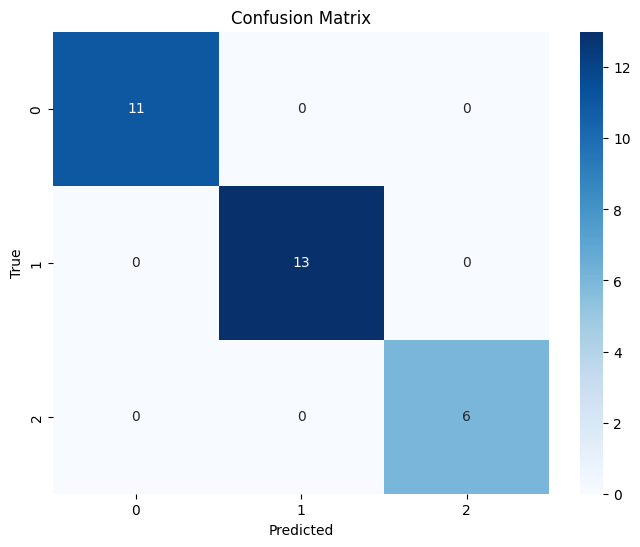

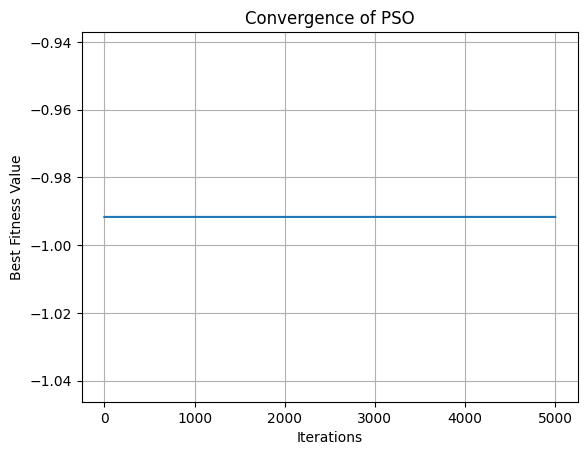

In [12]:
print(pd.DataFrame(data={'Classic NN':[accuracy_score(iris_nn_result[0],iris_nn_result[1]),iris_nn_result[2],iris_nn_result[3]],
                            'PSO NN':[accuracy_score(iris_pso_result[1],iris_pso_result[2]),iris_pso_result[3],iris_pso_result[4]]},
                            index=['Accuracy','Train time','Fit time']))
pso.visualize(iris_pso_result[1],iris_pso_result[2])

            Classic NN      PSO NN
Accuracy      0.566667    1.000000
Train time    0.584897  119.573583
Fit time      0.000000    0.000000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



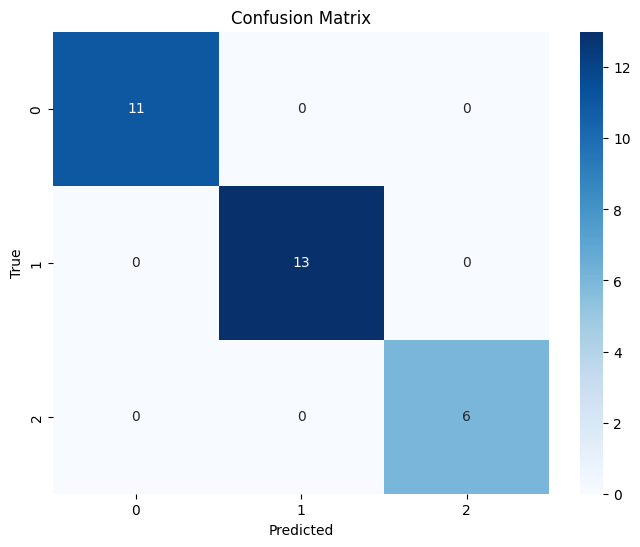

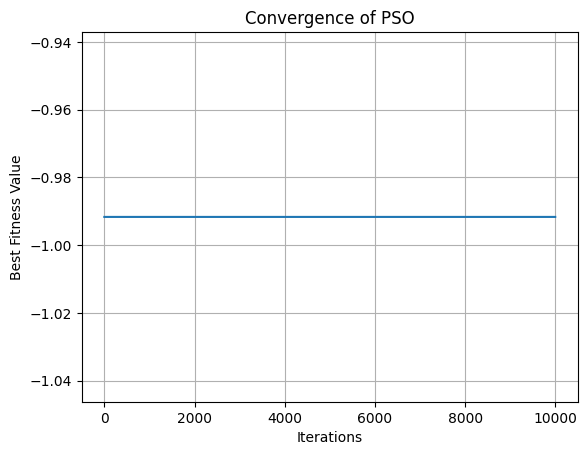